In [24]:
import statistics as st
import pandas as pd
import plotly.express as pe
import plotly.figure_factory as pf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

#reading the data from the cdn
df = pd.read_csv('https://raw.githubusercontent.com/whitehatjr/datasets/master/c117/BankNote_Authentication.csv')

#reading from first five rows
print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


[Text(0, 0.5, 'Authorised'), Text(0, 1.5, 'Not Authorised')]

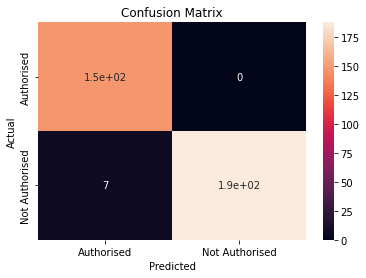

In [25]:
factors = df[['variance', 'skewness', 'curtosis', 'entropy']]
target = df['class']

factors_train, factors_test, target_train, target_test = train_test_split(factors, target, test_size=0.25, random_state=0)
sc_x = StandardScaler()

factors_train = sc_x.fit_transform(factors_train)
factors_test = sc_x.transform(factors_test)

classifier = LogisticRegression(random_state=0)
classifier.fit(factors_train, target_train)

authorised_pred = classifier.predict(factors_test)

predicted_val = []
for i in authorised_pred:
    if i == 1:
        predicted_val.append('Authorised')
    else:
        predicted_val.append('Not Authorised')
actual_val = []
for i in target_test:
    if i == 1:
        actual_val.append('Authorised')
    else:
        actual_val.append('Not Authorised')

labels = ["Authorised", "Not Authorised"]
cm = confusion_matrix(actual_val, predicted_val)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

In [31]:
"""Calculating the accuracy of the model"""
accuracy = classifier.score(factors_test, target_test)
print(accuracy, '%')

0.9795918367346939 %
